# HOUSE PRICE PREDICTION USING LINEAR REGRESSION

# READING THE DATASET

In [1]:
import pandas as pd
df=pd.read_csv("USA_Housing.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
df.shape

(5000, 7)

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

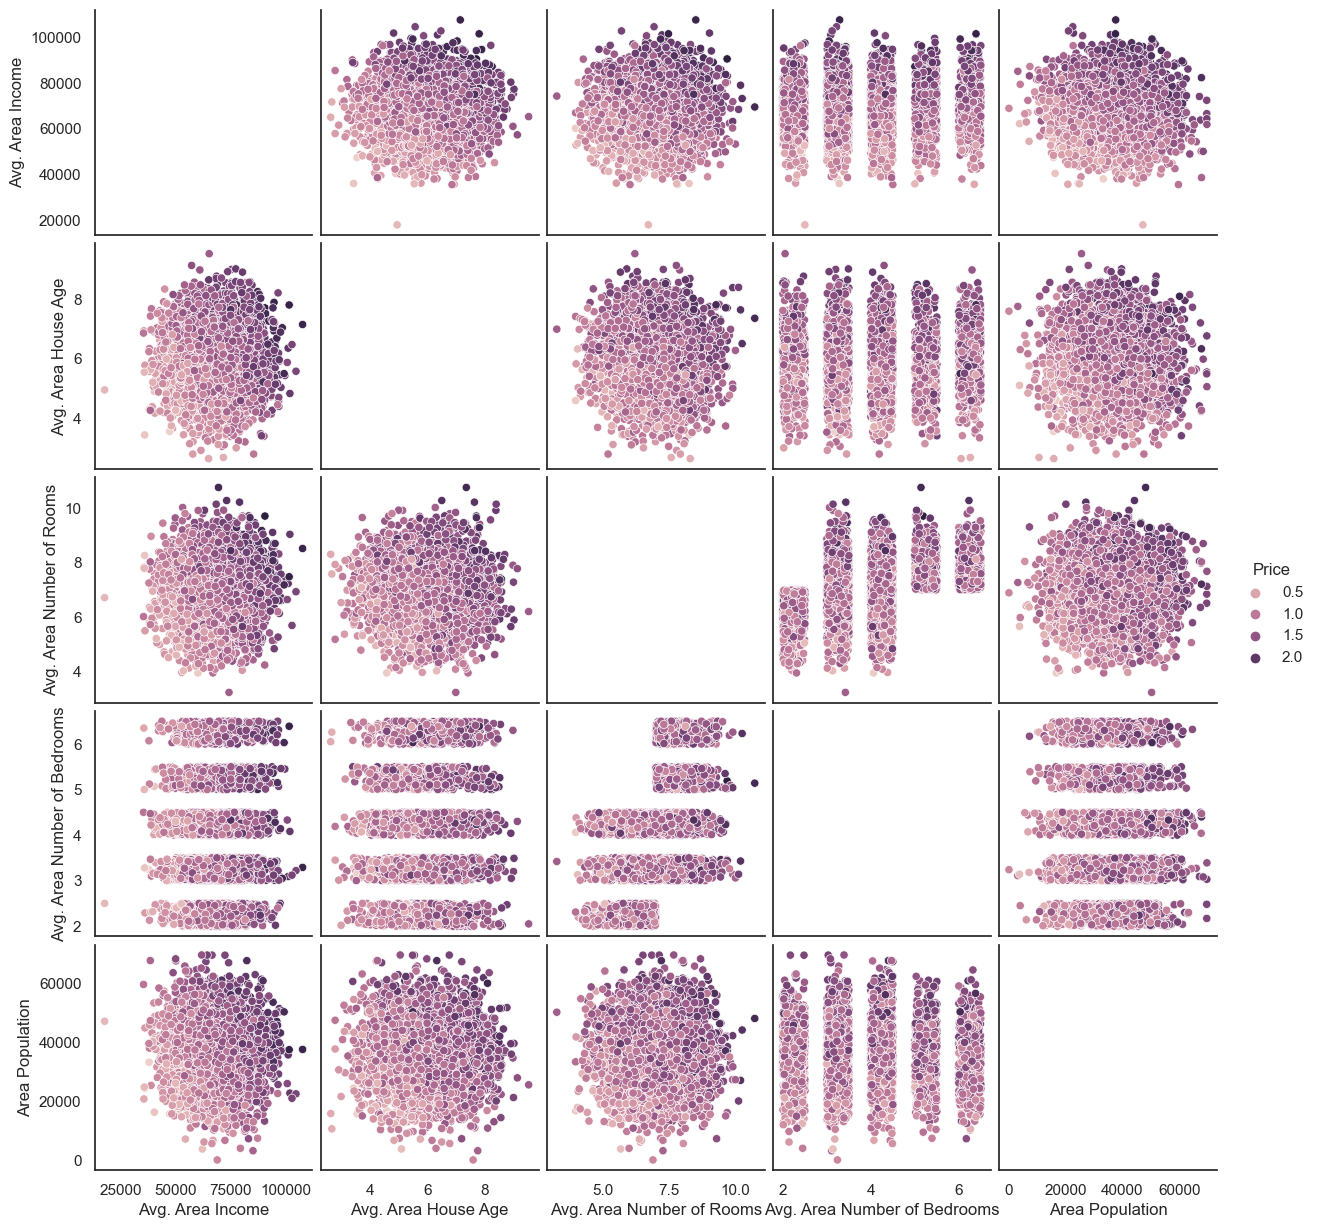

In [7]:
import seaborn as sns
sns.set(style="white",color_codes=True)
import matplotlib.pyplot as plt
sns.pairplot(df,hue="Price")


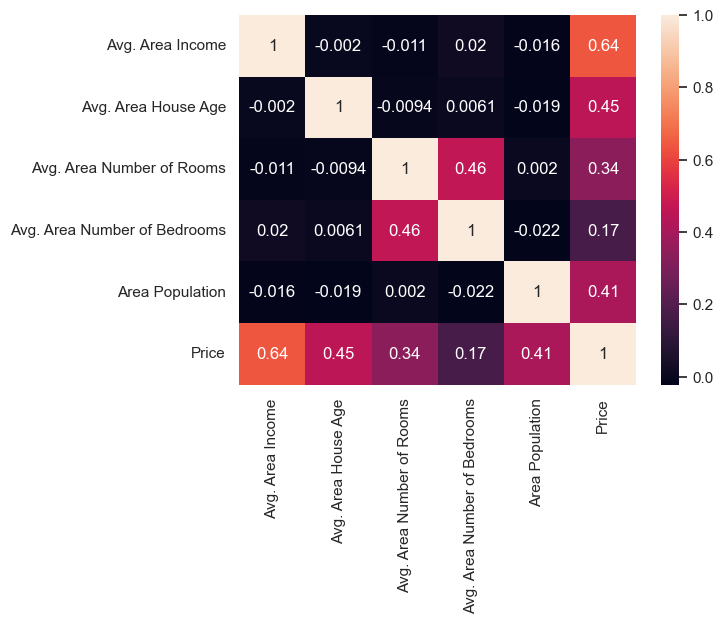

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
z=df.drop_duplicates()
x=df.drop(columns=['Price'])
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,USS Wallace\nFPO AE 73316


In [10]:
y=df['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

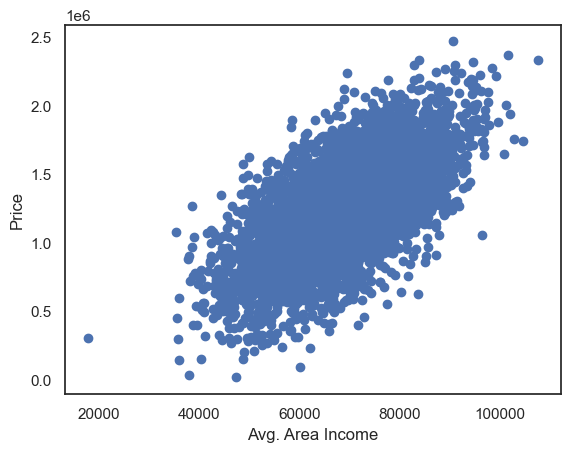

In [11]:
plt.scatter(df['Avg. Area Income'],df['Price'])
plt.xlabel("Avg. Area Income")
plt.ylabel("Price")
plt.show()

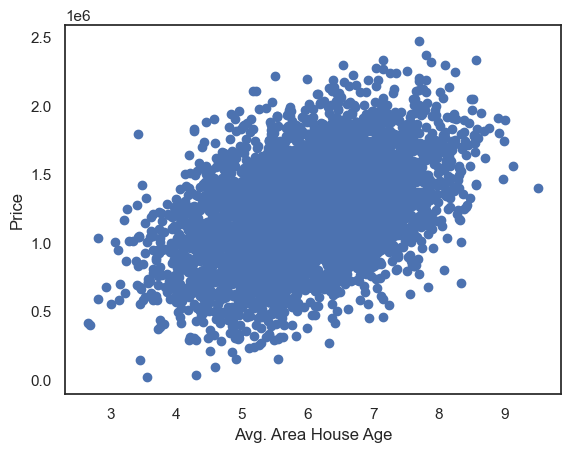

In [12]:
plt.scatter(df['Avg. Area House Age'],df['Price'])
plt.xlabel("Avg. Area House Age")
plt.ylabel("Price")
plt.show()

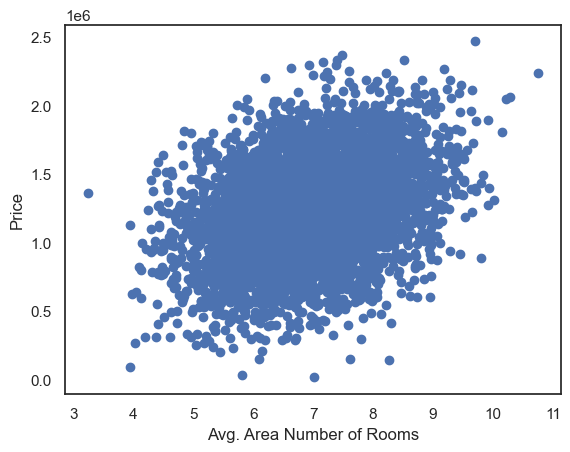

In [13]:
plt.scatter(df['Avg. Area Number of Rooms'],df['Price'])
plt.xlabel("Avg. Area Number of Rooms")
plt.ylabel("Price")
plt.show()

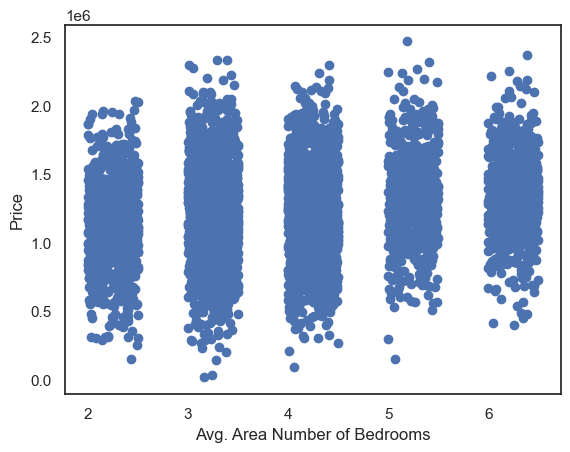

In [14]:
plt.scatter(df['Avg. Area Number of Bedrooms'],df['Price'])
plt.xlabel("Avg. Area Number of Bedrooms")
plt.ylabel("Price")
plt.show()

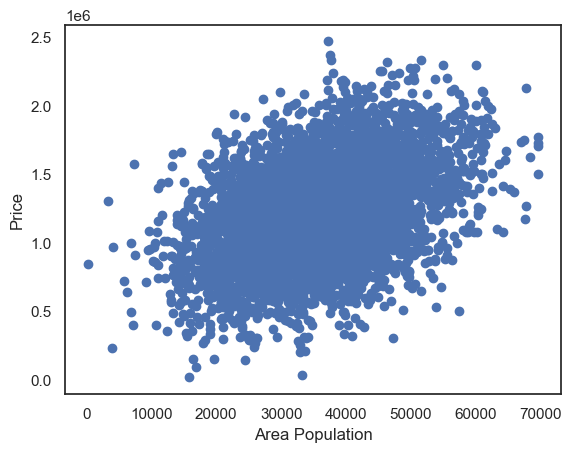

In [15]:
plt.scatter(df['Area Population'],df['Price'])
plt.xlabel("Area Population")
plt.ylabel("Price")
plt.show()

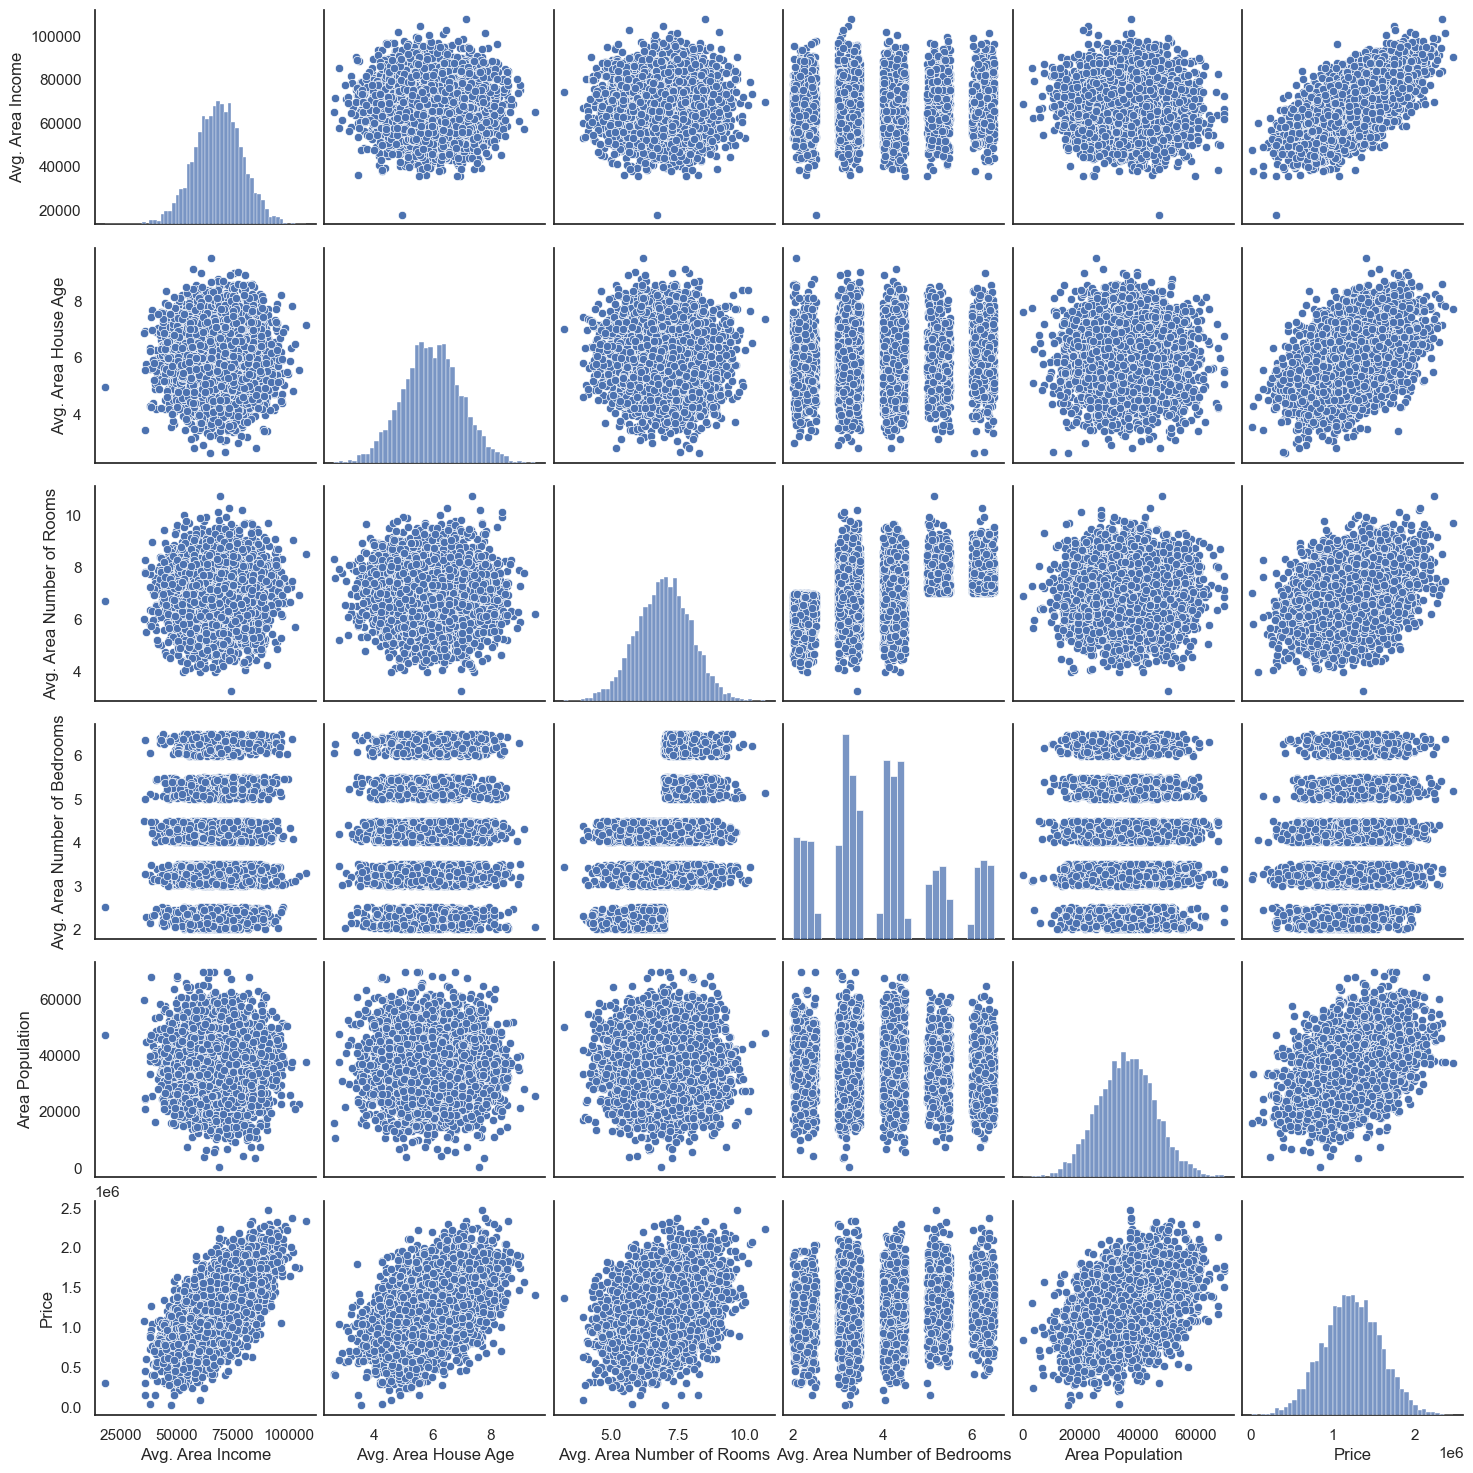

In [16]:
sns.pairplot(df)
plt.show()

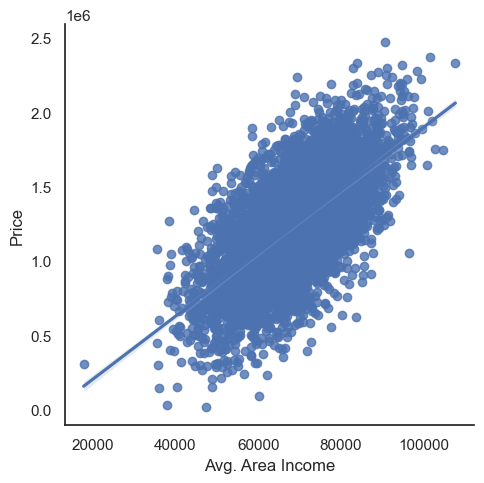

In [17]:
sns.lmplot(data=df,x='Avg. Area Income',y='Price')
plt.show()

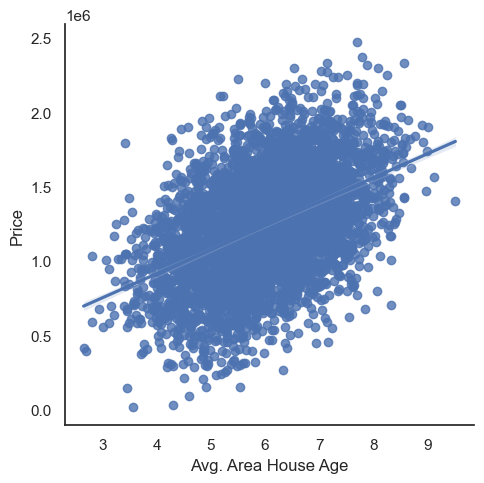

In [18]:
sns.lmplot(data=df,x='Avg. Area House Age',y='Price')
plt.show()

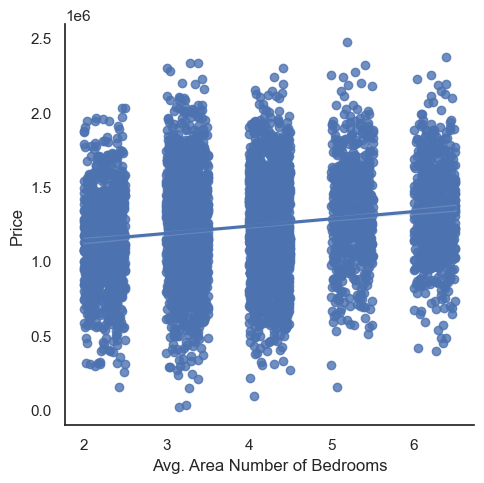

In [19]:
sns.lmplot(data=df,x='Avg. Area Number of Bedrooms',y='Price')
plt.show()

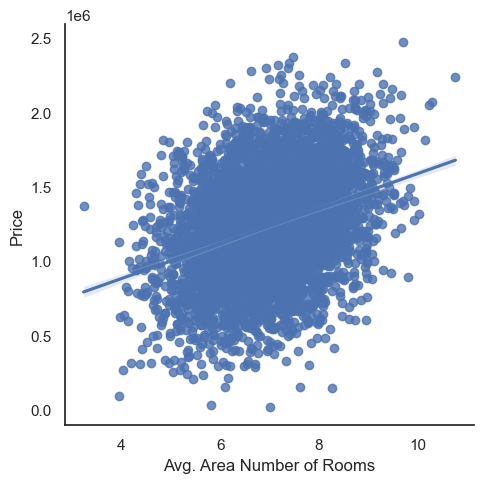

In [20]:
sns.lmplot(data=df,x='Avg. Area Number of Rooms',y='Price')
plt.show()


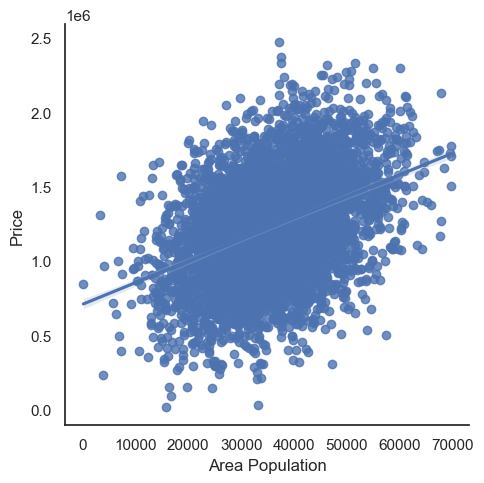

In [21]:
sns.lmplot(data=df,x='Area Population',y='Price')
plt.show()

In [22]:
x1=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']]
y1=df[['Price']]
print(x1)
print(y1)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  
0                             4.09  
1                             3.09  


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.5,random_state=1)

# MODEL CREATION

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# MODEL FITTING

In [25]:
print(x_train)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
2225      70956.999715             5.551592                   6.660051   
4244      76888.252464             4.831204                   5.805193   
4258      55833.701988             7.343876                   6.732812   
363       75175.873113             8.561762                   5.197254   
4850      70543.067221             6.106621                   8.385029   
...                ...                  ...                        ...   
2895      56734.350763             6.159101                   8.280404   
2763      50212.439535             6.645207                   7.404114   
905       80011.583519             6.448675                   6.489268   
3980      72899.658203             5.222040                   6.861010   
235       67056.840480             5.222169                   7.163518   

      Avg. Area Number of Bedrooms  
2225                          2.38  
4244                          4.47  


In [26]:
print(y_train)

             Price
2225  1.024602e+06
4244  1.124800e+06
4258  1.086717e+06
363   1.425603e+06
4850  1.480328e+06
...            ...
2895  1.063206e+06
2763  8.732420e+05
905   1.345963e+06
3980  1.270928e+06
235   1.039107e+06

[2500 rows x 1 columns]


In [27]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms
2764,75012.341660,6.742828,6.604335,4.10
4767,76187.273309,6.156222,7.166149,3.32
3814,67622.219611,5.813928,5.071112,4.16
3499,66933.165273,4.748787,5.879803,2.09
2735,65192.105635,6.275509,8.017889,4.47
...,...,...,...,...
3564,63889.411593,5.548089,6.357831,2.11
4538,74497.673077,6.166026,8.142658,4.01
3392,64547.646921,6.515966,4.626054,3.42
3112,88722.959535,5.864466,5.987424,4.06


In [28]:
y_test

,Price
2764,1.413580e+06
4767,1.618721e+06
3814,8.413925e+05
3499,8.814439e+05
2735,1.174748e+06
...,...
3564,1.134126e+06
4538,1.204753e+06
3392,1.074297e+06
3112,1.547127e+06


In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test)

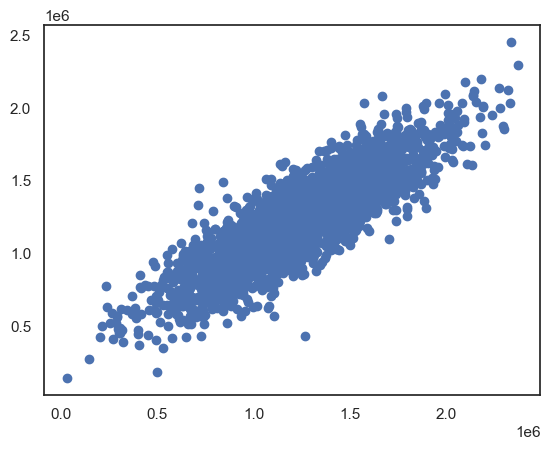

In [31]:
plt.scatter(y_test,y_pred)
plt.show()

# MODEL ACCURACY  

In [32]:
accuracy=lr.score(x_test,y_test)

In [33]:
print(accuracy*100)

73.66387687113036


# CONCLUSION

### In conclusion, I was able to achieve an accuracy of 73.66% in House price prediction using machine learning techniques in Python.